# Forward Feature Group Selection

## What are we talking about?

Forward feature group selection works as forward feature selection but it enables you to consider feature groups instead of only single features.

## Why?

Sometimes features can be grouped logically and it might be of interest how groups of features perform instead of single features. 

If this is the case, an additional advantage is that the number of iterations and train/val tasks needed to run through a sequential feature selection is lower.

## Example

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pprint as pp
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

from mlxtend import feature_selection
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

from eobox.ml import ffgs

### Dataset

We use the well known Iris dataset here but add additional columns without any information to have some more features.

In [3]:
iris = load_iris(as_frame=True)
X_informative = iris.data
np.random.seed(0)
X_uninformative = pd.DataFrame(np.random.uniform(X_informative.min(), 
                                                 X_informative.max(), 
                                                 size=X_informative.shape))
X_uninformative.columns = [f"noinfo-{i}" for i in range(X_uninformative.shape[1])]
X = pd.concat([X_informative, X_uninformative], axis=1)
y = iris.target
knn = KNeighborsClassifier(n_neighbors=4)
display(X.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),noinfo-0,noinfo-1,noinfo-2,noinfo-3
0,5.1,3.5,1.4,0.2,6.275729,3.716454,4.556304,1.407720
1,4.9,3.0,1.4,0.2,5.825157,3.550146,3.581765,2.240255
2,4.7,3.2,1.3,0.2,7.769186,2.920260,5.671178,1.369348
3,4.6,3.1,1.5,0.2,6.344960,4.221432,1.419113,0.309110
4,5.0,3.6,1.4,0.2,4.372786,3.998288,5.591125,2.188029


### Forward Feature Selection (FFS)

#### FFS on individual features

With FFS we consider and select one feature in each iteration. 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s finished
Features: 1/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s finished
Features: 2/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s finished
Features: 3/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
Features: 4/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished
Features: 5/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
Features: 6/8[Parallel(n_jobs

Iteration : Selected Features
1         : ('petal width (cm)',)
2         : ('petal length (cm)', 'petal width (cm)')
3         : ('petal length (cm)', 'petal width (cm)', 'noinfo-1')
4         : ('sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'noinfo-1')
5         : ('sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'noinfo-1')
6         : ('sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'noinfo-1', 'noinfo-3')
7         : ('sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'noinfo-1', 'noinfo-2', 'noinfo-3')
8         : ('sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'noinfo-0', 'noinfo-1', 'noinfo-2', 'noinfo-3')


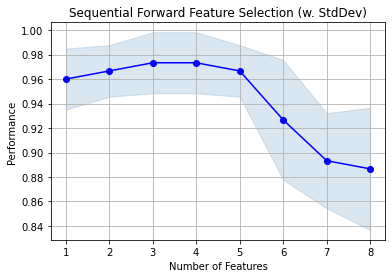

In [4]:
ffs = feature_selection.SequentialFeatureSelector(knn, 
                                                  k_features=X.shape[1], 
                                                  forward=True, 
                                                  floating=False, 
                                                  scoring='accuracy',
                                                  verbose=1
                                                  )
ffs = ffs.fit(X, y, custom_feature_names=X.columns)
    
print(f"Iteration : Selected Features")
for iter, subset in ffs.subsets_.items():
    print(f"{iter}         : {subset['feature_names']}")

plot_sfs(ffs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Feature Selection (w. StdDev)')
plt.grid()
plt.show()

#### FFGS - Forward Feature *Group* Selection

With FFGS we can define groups of features and consider and select these groups of feature in each iteration.
Here we define four groups of features. 

In [5]:
fgroups_dict = {
    0: [0, 1], # sepal features
    1: [2, 3], # petal features 
    2: [4], # a single no-info feature
    3: [5, 6, 7], # three no-info features
}
fgroups = np.zeros(X.shape[1], dtype=int)
for group, feature_indices in fgroups_dict.items():
    # print(group, feature_indices)
    fgroups[np.array(feature_indices)] = group
print("fgroups:", fgroups)

fgroups: [0 0 1 1 2 3 3 3]


We run a forward feature group selection similar to the forward squential feature selection just that we additionally have to specify the feature grouping. 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished
Features: 2/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
Features: 4/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
Features: 5/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
Features: 8/8

Iteration : Selected Features
2         : ('petal length (cm)', 'petal width (cm)')
4         : ('sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)')
5         : ('sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'noinfo-0')
8         : ('sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'noinfo-0', 'noinfo-1', 'noinfo-2', 'noinfo-3')


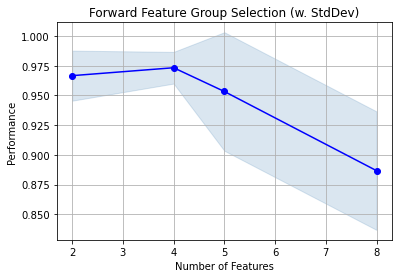

In [6]:
mod = KNeighborsClassifier(n_neighbors=4)
fsel = ffgs.ForwardFeatureGroupSelection(mod, 
                                         k_features=X.shape[1],
                                         scoring='accuracy',
                                         verbose=1)

fsel = fsel.fit(X, y, custom_feature_names=X.columns, fgroups=fgroups)

    
print(f"Iteration : Selected Features")
for iter, subset in fsel.subsets_.items():
    print(f"{iter}         : {subset['feature_names']}")

plot_sfs(fsel.get_metric_dict(), kind='std_dev')
plt.title('Forward Feature Group Selection (w. StdDev)')
plt.grid()
plt.show()

### Computational cost

As mentioned above the number of iterations and train/val tasks are lower if we can cosider groups of features instead of single features only.

To evaluate the 4 feature *groups* we needed to train and estimate the performance for 9 feature sets while for the feature selection on 8 individual feautes this number increases to 35.

In [7]:
print("Number of CV runs with single features FFS    : ", ffgs.get_number_of_ffs_iterations(8))
print("Number of CV runs with group-wise features FFS: ", ffgs.get_number_of_ffs_iterations(4))

Number of CV runs with single features FFS    :  35
Number of CV runs with group-wise features FFS:  9
